In [1]:
import pandas as pd
mk_table = pd.read_csv("MK_twitter_table.csv")
mk_table['twitter_account'] = mk_table['twitter_account'].str.lower()
mk_table.head()

,name,original_party,account_link,twitter_account,party,block
0,אבו שחאדה סמי,הרשימה המשותפת,https://twitter.com/ShahadehAbou,shahadehabou,Joint_List,Arabs
1,אבוטבול משה,ש”ס,https://twitter.com/Abutbulm,abutbulm,Shas,Ultra-orthodox
2,אבידר אלי,ישראל ביתנו,http://twitter.com/avidareli,avidareli,Israel_Beiteinu,Right
3,אדלשטיין יולי יואל,הליכוד,http://twitter.com/YuliEdelstein,yuliedelstein,Likud,Right
4,אזולאי ינון,ש”ס,NaN,NaN,Shas,Ultra-orthodox


In [2]:
#Number of Twitter accounts: 
mk_table.twitter_account.count()

110

In [3]:
# Twitter accounts by political party
twitter_accounts_by_party = mk_table.groupby('party', as_index=False).count()
twitter_accounts_by_party['have_twitter'] = twitter_accounts_by_party['twitter_account'] / twitter_accounts_by_party['name']
twitter_accounts_by_party = twitter_accounts_by_party[['party','name','twitter_account','have_twitter']]
twitter_accounts_by_party.rename(columns={'name':'members', 'twitter_account':'twitter_accounts'}, inplace=True)
twitter_accounts_by_party.sort_values(by=['have_twitter','members'], ascending=False)

,party,members,twitter_accounts,have_twitter
13,Yesh_Atid,19,19,1.000000
7,Joint_List,15,15,1.000000
0,Blue_and_White,12,12,1.000000
6,Israel_Beiteinu,7,7,1.000000
9,Meretz,4,4,1.000000
12,Yamina,3,3,1.000000
1,Derech_Eretz,2,2,1.000000
3,HaAvoda,2,2,1.000000
5,Haihud_haLeumi,2,2,1.000000
2,Gesher,1,1,1.000000


In [4]:
# Twitter accounts by political block
twitter_accounts_by_block = mk_table.groupby('block', as_index=False).count()
twitter_accounts_by_block['have_twitter'] = twitter_accounts_by_block['twitter_account'] / twitter_accounts_by_block['name']
twitter_accounts_by_block = twitter_accounts_by_block[['block','name','twitter_account','have_twitter']]
twitter_accounts_by_block.rename(columns={'name':'members', 'twitter_account':'twitter_accounts'}, inplace=True)
twitter_accounts_by_block.sort_values(by=['have_twitter','members'], ascending=False)
twitter_accounts_by_block

,block,members,twitter_accounts,have_twitter
0,Arabs,15,15,1.000000
1,Center_Left,38,38,1.000000
2,Right,51,49,0.960784
3,Ultra-orthodox,16,8,0.500000


In [5]:
# for index, row in mk_table.iterrows():
#     if pd.notnull(row['twitter_account']):
#         print(row['twitter_account'])
#         print(index)

** Get data from Twitter api ** 

In [6]:
%%script false

import configparser
from tweepy import API, Cursor, OAuthHandler, TweepError

Couldn't find program: 'false'


In [7]:
%%script false

# Read in configs
configs = configparser.ConfigParser()
configs.read('./config.ini')
keys = configs['TWITTER']
consumer_key = keys['CONSUMER_KEY'] 
consumer_secret = keys['CONSUMER_SECRET'] 
access_token = keys['ACCESS_TOKEN']
access_secret = keys['ACCESS_SECRET']

Couldn't find program: 'false'


In [8]:
%%script false

# Authenticate Tweepy connection to Twitter API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Couldn't find program: 'false'


In [9]:
%%script false

# Obtaining all data from Twitter API: 

all_mk_connections = []

for mk_num, row in mk_table.iterrows():
    if pd.notnull(row['twitter_account']): 

        # Getting id for each account the MK follows:
        screen_name = mk_table.twitter_account[mk_num]
        ids = []
        for fid in Cursor(api.friends_ids, screen_name=screen_name, count=5000).items():
            ids.append(fid)

        # Getting more details for each id: 
        info = []
        for i in range(0, len(ids), 100):
            try:
                chunk = ids[i:i+100]
                info.extend(api.lookup_users(user_ids=chunk))
            except:
                import traceback
                traceback.print_exc()
                print('Something went wrong, skipping...')

        # Saving username for each account the MK follows: 
        data = [x._json for x in info]
        mk_connections = pd.DataFrame(data)
        mk_connections = mk_connections[['screen_name']]
        mk_connections['mk'] = mk_table.twitter_account[mk_num]
        mk_connections['screen_name'] = mk_connections['screen_name'].str.lower()

        # Keeping only MKs usernames the MK follows: 
        mk_connections_only_mk = pd.merge(mk_connections, mk_table['twitter_account'], left_on="screen_name", right_on="twitter_account").drop('twitter_account', axis=1)

        # store DataFrame in list
        all_mk_connections.append(mk_connections_only_mk)


Couldn't find program: 'false'


In [10]:
%%script false

all_mk_connections = pd.concat(all_mk_connections)
all_mk_connections.to_csv('all_mk_connections.csv')
all_mk_connections

Couldn't find program: 'false'


** Analyze data from Twitter ** 

In [11]:
all_mk_connections = pd.read_csv("all_mk_connections.csv")
del all_mk_connections['Unnamed: 0']
all_mk_connections = all_mk_connections[['mk','screen_name']]
all_mk_connections.rename(columns={'mk':'follower_mk', 'screen_name':'followed_mk'}, inplace=True)
all_mk_connections

,follower_mk,followed_mk
0,shahadehabou,evgenysova
1,shahadehabou,bussouriel
2,shahadehabou,gilagamliel
3,shahadehabou,yairlapid
4,shahadehabou,kushnir_al
...,...,...
3463,pnina_tamano_sh,mkgilon
3464,pnina_tamano_sh,ayoobkara
3465,pnina_tamano_sh,orly_levy
3466,pnina_tamano_sh,elicoh1


In [12]:
# The number of Mks each MK follows: 
pd.set_option('display.max_rows',200)
MK_follow_after = all_mk_connections.groupby('follower_mk', as_index=False).count().sort_values('followed_mk', ascending=False).rename(columns={'follower_mk':'twitter_account', 'followed_mk':'following'})
MK_follow_after.head(10)

,twitter_account,following
46,malkielim82,93
83,shahadehabou,80
41,izhars7,78
45,kushnir_al,76
68,ofirkatzmk,75
24,eitanginzburg,69
92,vladimirbeliak,69
1,abutbulm,66
106,yuliamalinovsky,66
18,bussouriel,63


In [13]:
# The number of followers each MK has: 
MK_followed_by = all_mk_connections.groupby('followed_mk', as_index=False).count().sort_values('follower_mk', ascending=False).rename(columns={'followed_mk':'twitter_account','follower_mk':'followers'})
MK_followed_by.head(10)

,twitter_account,followers
57,netanyahu,85
91,yairlapid,78
10,ayelet__shaked,76
56,naftalibennett,75
96,yoazhendel1,72
46,meravmichaeli,71
9,avigdorliberman,70
13,bezalelsm,70
14,bogie_yaalon,69
75,regev_miri,69


In [14]:
popularity_by_individual = MK_follow_after.merge(MK_followed_by, how='outer').sort_values('followers', ascending=False).fillna(0)
popularity_by_individual['reciprocity_ratio'] = popularity_by_individual['followers']/popularity_by_individual['following']
popularity_by_individual = popularity_by_individual.sort_values('followers', ascending=False).merge(mk_table[['twitter_account','name','party','block']], on="twitter_account").rename(columns={'name':'mk'})
popularity_by_individual[['mk', 'party', 'block', 'twitter_account', 'following', 'followers', 'reciprocity_ratio']].head(10)

,mk,party,block,twitter_account,following,followers,reciprocity_ratio
0,נתניהו בנימין,Likud,Right,netanyahu,11,85.0,7.727273
1,לפיד יאיר,Yesh_Atid,Center_Left,yairlapid,19,78.0,4.105263
2,שקד אילת,Yamina,Right,ayelet__shaked,27,76.0,2.814815
3,בנט נפתלי,Yamina,Right,naftalibennett,25,75.0,3.000000
4,הנדל יועז,Derech_Eretz,Right,yoazhendel1,35,72.0,2.057143
5,מיכאלי מרב,HaAvoda,Center_Left,meravmichaeli,6,71.0,11.833333
6,ליברמן אביגדור,Israel_Beiteinu,Right,avigdorliberman,13,70.0,5.384615
7,סמוטריץ' בצלאל,Haihud_haLeumi,Right,bezalelsm,6,70.0,11.666667
8,יעלון משה,Yesh_Atid,Center_Left,bogie_yaalon,54,69.0,1.277778
9,רגב מירי מרים,Likud,Right,regev_miri,1,69.0,69.000000


In [15]:
# Reciprocity level by party: 
popularity_by_party = popularity_by_individual.groupby(['party']).sum()
popularity_by_party['reciprocity_ratio'] = popularity_by_party['followers']/popularity_by_party['following']
popularity_by_party.sort_values('reciprocity_ratio', ascending=False)

,following,followers,reciprocity_ratio
party,,,
Habayit_hayehudi,4,34.0,8.500000
HaAvoda,22,136.0,6.181818
Gesher,12,42.0,3.500000
Yamina,73,175.0,2.397260
Meretz,94,199.0,2.117021
Haihud_haLeumi,49,97.0,1.979592
Derech_Eretz,77,132.0,1.714286
Likud,916,1105.0,1.206332
Israel_Beiteinu,218,180.0,0.825688


In [16]:
# Reciprocity level by block: 
popularity_by_block = popularity_by_individual.groupby(['block']).sum()
popularity_by_block['reciprocity_ratio'] = popularity_by_block['followers']/popularity_by_block['following']
popularity_by_block.sort_values('reciprocity_ratio', ascending=False)

,following,followers,reciprocity_ratio
block,,,
Right,1337,1723.0,1.288706
Center_Left,1376,1380.0,1.002907
Arabs,445,269.0,0.604494
Ultra-orthodox,310,96.0,0.309677


** Calculating the extent by which each MK follows his/her political block compared to other blocks. Balance ratio's range is between (-1, +1). +1= follows only all of his block. -1= follows only all other MKs from other blocks **

In [17]:
party_block_table = mk_table.groupby(['party','block'], as_index=False).count()[['party', 'block']]

In [18]:
all_mk_connections_meta = pd.merge(all_mk_connections, mk_table[['twitter_account','party']], left_on="follower_mk", right_on="twitter_account").drop('twitter_account', axis=1).rename(columns={'party':'follower_party'})

all_mk_connections_meta = all_mk_connections_meta.merge(mk_table[['twitter_account','party']], left_on="followed_mk", right_on="twitter_account").drop('twitter_account', axis=1).rename(columns={'party':'followed_party'}).sort_values(by='follower_mk')

all_mk_connections_meta = all_mk_connections_meta.merge(mk_table[['twitter_account','block']], left_on="follower_mk", right_on="twitter_account").drop('twitter_account', axis=1).rename(columns={'block':'follower_block'}).sort_values(by='follower_mk')

all_mk_connections_meta = all_mk_connections_meta.merge(mk_table[['twitter_account','block']], left_on="followed_mk", right_on="twitter_account").drop('twitter_account', axis=1).rename(columns={'block':'followed_block'}).sort_values(by='follower_mk')

# all_mk_connections_meta.to_csv('all_mk_connections_meta.csv')

all_mk_connections_meta.head(10)

,follower_mk,followed_mk,follower_party,followed_party,follower_block,followed_block
0,aamarhamad,ahmad_tibi,Israel_Beiteinu,Joint_List,Right,Arabs
199,aamarhamad,ofirakunis,Israel_Beiteinu,Likud,Right,Right
228,aamarhamad,ayelet__shaked,Israel_Beiteinu,Yamina,Right,Right
304,aamarhamad,bogie_yaalon,Israel_Beiteinu,Yesh_Atid,Right,Center_Left
373,aamarhamad,avigdorliberman,Israel_Beiteinu,Israel_Beiteinu,Right,Right
42,aamarhamad,netanyahu,Israel_Beiteinu,Likud,Right,Right
127,aamarhamad,yoazhendel1,Israel_Beiteinu,Derech_Eretz,Right,Right
1536,abutbulm,tehilafriedman,Shas,Blue_and_White,Ultra-orthodox,Center_Left
921,abutbulm,eitanginzburg,Shas,Blue_and_White,Ultra-orthodox,Center_Left
2435,abutbulm,orly_levy,Shas,Gesher,Ultra-orthodox,Center_Left


In [19]:
%%capture
for mk_num, row in mk_table.iterrows():
    if pd.notnull(row['twitter_account']): 
        row['twitter_account']

        # Twitter accounts by party each MK is following: 
        table1_following_by_party = all_mk_connections_meta[['follower_mk','followed_mk', 'followed_party']].groupby(['follower_mk','followed_party'], as_index=False).count().merge(mk_table[['twitter_account','block']], left_on="follower_mk", right_on="twitter_account").drop('twitter_account', axis=1).rename(columns={'block':'follower_mk_block'})

        table2_following_by_party_oneMK = table1_following_by_party.loc[table1_following_by_party.follower_mk == row['twitter_account']]
        # table2_following_by_party_oneMK

        # Calculating the ratio of following inside the block and outside the block: 
        table3_balance_ratio = twitter_accounts_by_party.merge(party_block_table)[['block', 'party', 'twitter_accounts']].merge(table2_following_by_party_oneMK, left_on="party", right_on="followed_party", how="outer")
        table3_balance_ratio['followed_mk'] = table3_balance_ratio['followed_mk'].fillna(0)
        table3_balance_ratio['same_block'] = np.where(table3_balance_ratio['block'].isin(popularity_by_individual.loc[popularity_by_individual.twitter_account == row['twitter_account'], "block"]), True, False)
        table3_balance_ratio = table3_balance_ratio.groupby(['same_block']).sum()
        table3_balance_ratio['follow_percent'] = table3_balance_ratio['followed_mk'] / table3_balance_ratio['twitter_accounts']
        # table3_balance_ratio

        # Updating the table in the balance ratio: 
        balance_ratio = table3_balance_ratio.loc[True, "follow_percent"] + table3_balance_ratio.loc[False, "follow_percent"]*-1
        popularity_by_individual.loc[popularity_by_individual.twitter_account == row['twitter_account'], "balance_ratio"] = balance_ratio

In [20]:
popularity_by_individual.sort_values(by='balance_ratio', ascending=True)

,twitter_account,following,followers,reciprocity_ratio,mk,party,block,balance_ratio
100,pindrosy,46,4.0,0.086957,פינדרוס יצחק זאב,Yahadut_hatora,Ultra-orthodox,-0.450980
71,malkielim82,93,19.0,0.204301,מלכיאלי מיכאל,Shas,Ultra-orthodox,-0.372549
42,yakmargi,15,34.0,2.266667,מרגי יעקב,Shas,Ultra-orthodox,-0.147059
106,pikeaccount,12,0.0,0.000000,אשר יעקב,Yahadut_hatora,Ultra-orthodox,-0.117647
90,abutbulm,66,10.0,0.151515,אבוטבול משה,Shas,Ultra-orthodox,-0.107843
84,bussouriel,63,13.0,0.206349,בוסו אוריאל,Shas,Ultra-orthodox,-0.078431
64,matankahana,21,24.0,1.142857,כהנא מתן,Yamina,Right,-0.049849
29,mkgilon,46,42.0,0.913043,גילאון אילן,Meretz,Center_Left,-0.035819
4,yoazhendel1,35,72.0,2.057143,הנדל יועז,Derech_Eretz,Right,-0.021746
101,yisraeleichler,2,4.0,2.000000,אייכלר ישראל,Yahadut_hatora,Ultra-orthodox,-0.019608


** Clustering MKs into groups using KMeans ** 

In [21]:
all_mk_connections['value'] = 1
all_mk_connections

all_mk_connections_matrix = all_mk_connections.pivot_table(index=["follower_mk"], 
                    columns='followed_mk', 
                    values='value',
                    margins=True,  # add margins
                    aggfunc='sum').fillna(0)  # sum margins (rows/columns)

# all_mk_connections_matrix.to_csv('all_mk_connections_matrix.csv')

In [22]:
# Drop last column and row: 
all_mk_connections_matrix.drop(['All'], axis=1, inplace=True)
all_mk_connections_matrix.drop(all_mk_connections_matrix.tail(1).index,inplace=True) 

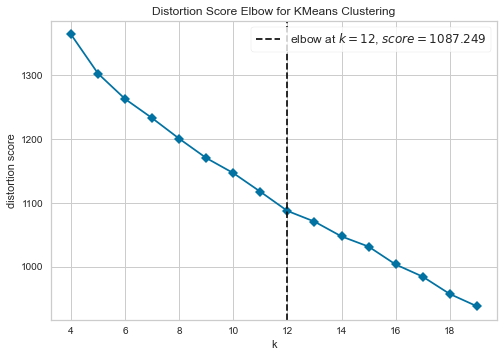

In [23]:
# Finding optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1234)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(4,20), timings=False)
visualizer.fit(all_mk_connections_matrix)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(all_mk_connections_matrix)
y_kmeans = kmeans.predict(all_mk_connections_matrix)

In [25]:
all_mk_connections_matrix['cluster'] = pd.Series(y_kmeans, index=all_mk_connections_matrix.index)

In [26]:
# all_mk_connections_matrix['cluster'].sort_values(ascending=True)

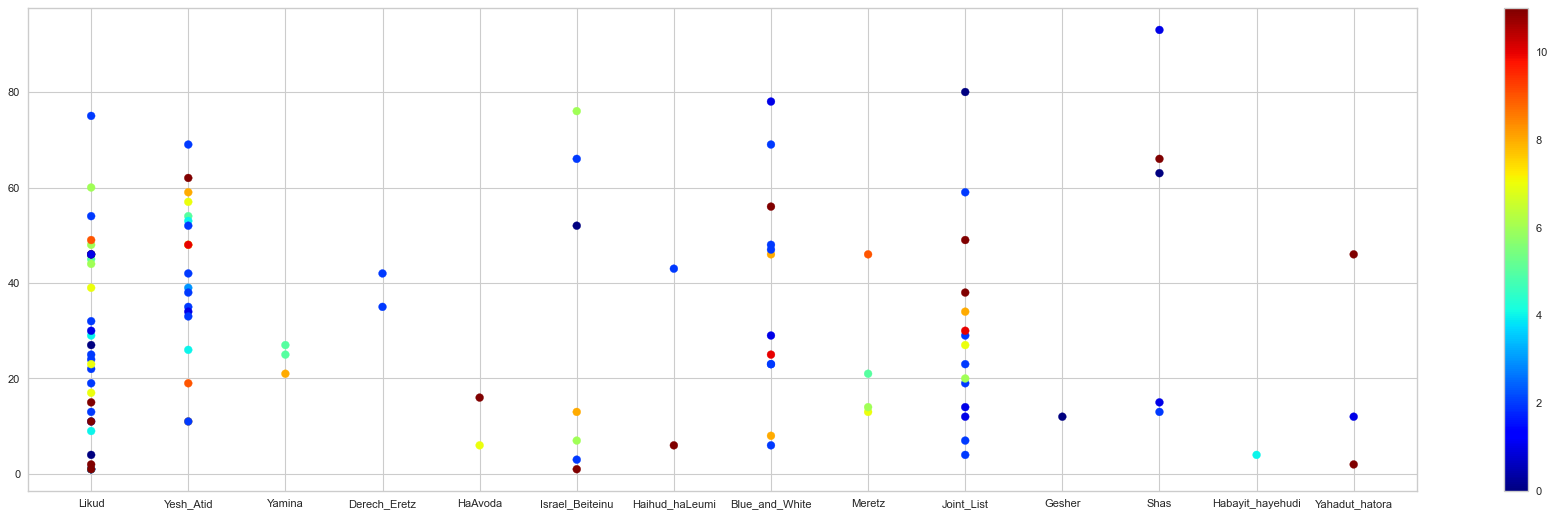

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(28, 8), dpi=80)
plt.scatter(popularity_by_individual['party'], popularity_by_individual['following'], s=50, c=y_kmeans, cmap=cm.jet)
plt.colorbar()